In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import os
from scipy.stats.mstats import pearsonr, spearmanr

In [2]:
subset = False
fol = '/Users/irffanalahi/Research/Research_update/SoftRD/largerEXP/BL22genepromdelta.7/Realdata/corr/Morecelltypes/perct_corr/try2_formethod_summary'

files = os.listdir(fol)

if '.ipynb_checkpoints' in files:
    files.remove('.ipynb_checkpoints')

if '.DS_Store' in files:
    files.remove('.DS_Store')

In [3]:
dfs = []
for i, file in enumerate(files):
    data = pd.read_csv(fol + '/' + file, sep='\t', index_col=0)
    df = pd.DataFrame(data)
    dfs.append(df.copy())
    
for i, df in enumerate(dfs):
    cols = []
    for cell in list(df.columns):
        if '.x' in cell:
            cols.append(cell.split('.')[0])
        elif '.y' in cell:
            cols.append(cell.split('.')[0] + '_real')
        else:
            cols.append(cell)
    df.columns = cols

for i, df in enumerate(dfs): 
    if i == 0:
        samples = list(df.index)
        columns = list(df.columns)
    else:
        new_samples = list(df.index)
        new_columns = list(df.columns)
        samples = list(set(new_samples).intersection(samples))
        columns = list(set(new_columns + columns))
    columns = list(set(columns))


new_columns = []
for col in columns:
    if '_real' in col:
        new_columns.append(col.split('_')[0])
        
columns = new_columns
print(columns)

['Mono', 'em4', 'NaiveCD8', 'nB', 'mB', 'ed8', 'cm8', 'em8', 'Tregs', 'NaiveCD4', 'NK', 'PC', 'cm4']


In [4]:
def generate_df_dic(correlation, dfs, columns):
    df_corr = {}
    for i, df in enumerate(dfs):
        if subset:
            df = df.loc[samples, :]
        for cell in columns:
            if cell in df.columns:
                if cell not in df_corr:
                    df_corr[cell] = []
                corr = correlation(list(df[cell]), list(df[cell + '_real']))[0]
                df_corr[cell].append(corr)
            else:
                df_corr[cell].append(float('NaN'))
    return df_corr

In [5]:
df_pearson_dic = generate_df_dic(pearsonr, dfs, columns)
df_spearman_dic = generate_df_dic(spearmanr, dfs, columns)

In [6]:
df_pearson = pd.DataFrame.from_dict(df_pearson_dic, orient='index', columns = files)
df_spearman = pd.DataFrame.from_dict(df_spearman_dic, orient='index', columns = files)
display(df_pearson)



,BL22_genepromSM_0.7.txt_TRAININGbestref.txt_result_dupindex_binnedstats.pkladjustedScore_minus_avg_CSxOut.txt_1stflow_7samples_fixedDCm4trfixed_morect_8subsetANDPCfromcytof.txt,BL22_genepromSM_0.7.txt_TRAININGbestref.txt_result_dupindex_binnedstats.pkladjustedScore_minus_avg_CSxOut.txt_cytof_fixedDCm5trfixed.txt
Mono,0.857718,0.414534
em4,0.625944,0.630755
NaiveCD8,0.627181,0.805827
nB,0.828408,-0.254366
mB,0.702705,0.695063
ed8,0.570940,0.570940
cm8,0.788964,0.788964
em8,0.406526,0.406526
Tregs,0.761544,0.903626
NaiveCD4,0.732124,0.742355


In [7]:
df_pearson.rename(index={"NaiveCD8":"Naive CD8 T","NaiveCD4":"Naive CD4 T","CD4": "Naive CD4", "CD8": "Naive CD8","mB":"Memory B",'Mn':'Mono','CD14':'Mono','CD19':'B Cell','nB':'Naive B','PC':'Palsma','cm8':'CD8 central memory','em8':'CD8 effector memory','m8':'CD8 memory','ed8':'CD8 effector','cm4':'CD4 central memory','em4':'CD4 effector memory','m4':'CD4 memory','mNeu':'PMN','Eo':'Eosinophil','Tr':'Tregs','Mg':'Megakaryocyte'},inplace=True)
display(df_pearson)

,BL22_genepromSM_0.7.txt_TRAININGbestref.txt_result_dupindex_binnedstats.pkladjustedScore_minus_avg_CSxOut.txt_1stflow_7samples_fixedDCm4trfixed_morect_8subsetANDPCfromcytof.txt,BL22_genepromSM_0.7.txt_TRAININGbestref.txt_result_dupindex_binnedstats.pkladjustedScore_minus_avg_CSxOut.txt_cytof_fixedDCm5trfixed.txt
Mono,0.857718,0.414534
CD4 effector memory,0.625944,0.630755
Naive CD8 T,0.627181,0.805827
Naive B,0.828408,-0.254366
Memory B,0.702705,0.695063
CD8 effector,0.570940,0.570940
CD8 central memory,0.788964,0.788964
CD8 effector memory,0.406526,0.406526
Tregs,0.761544,0.903626
Naive CD4 T,0.732124,0.742355


In [8]:
df_spearman.rename(index={"NaiveCD8":"Naive CD8 T","NaiveCD4":"Naive CD4 T","CD4": "Naive CD4", "CD8": "Naive CD8","mB":"Memory B",'Mn':'Mono','CD14':'Mono','CD19':'B Cell','nB':'Naive B','PC':'Palsma','cm8':'CD8 central memory','em8':'CD8 effector memory','m8':'CD8 memory','ed8':'CD8 effector','cm4':'CD4 central memory','em4':'CD4 effector memory','m4':'CD4 memory','mNeu':'PMN','Eo':'Eosinophil','Tr':'Tregs','Mg':'Megakaryocyte'},inplace=True)
df_spearman.head()

,BL22_genepromSM_0.7.txt_TRAININGbestref.txt_result_dupindex_binnedstats.pkladjustedScore_minus_avg_CSxOut.txt_1stflow_7samples_fixedDCm4trfixed_morect_8subsetANDPCfromcytof.txt,BL22_genepromSM_0.7.txt_TRAININGbestref.txt_result_dupindex_binnedstats.pkladjustedScore_minus_avg_CSxOut.txt_cytof_fixedDCm5trfixed.txt
Mono,0.571429,0.035714
CD4 effector memory,0.750000,0.642857
Naive CD8 T,0.285714,0.714286
Naive B,0.571429,0.035714
Memory B,0.678571,0.678571


In [9]:
df_pearson.to_csv(fol + '_pearson_correlation.txt', sep='\t')
df_spearman.to_csv(fol + '_spearman_correlation.txt', sep='\t')

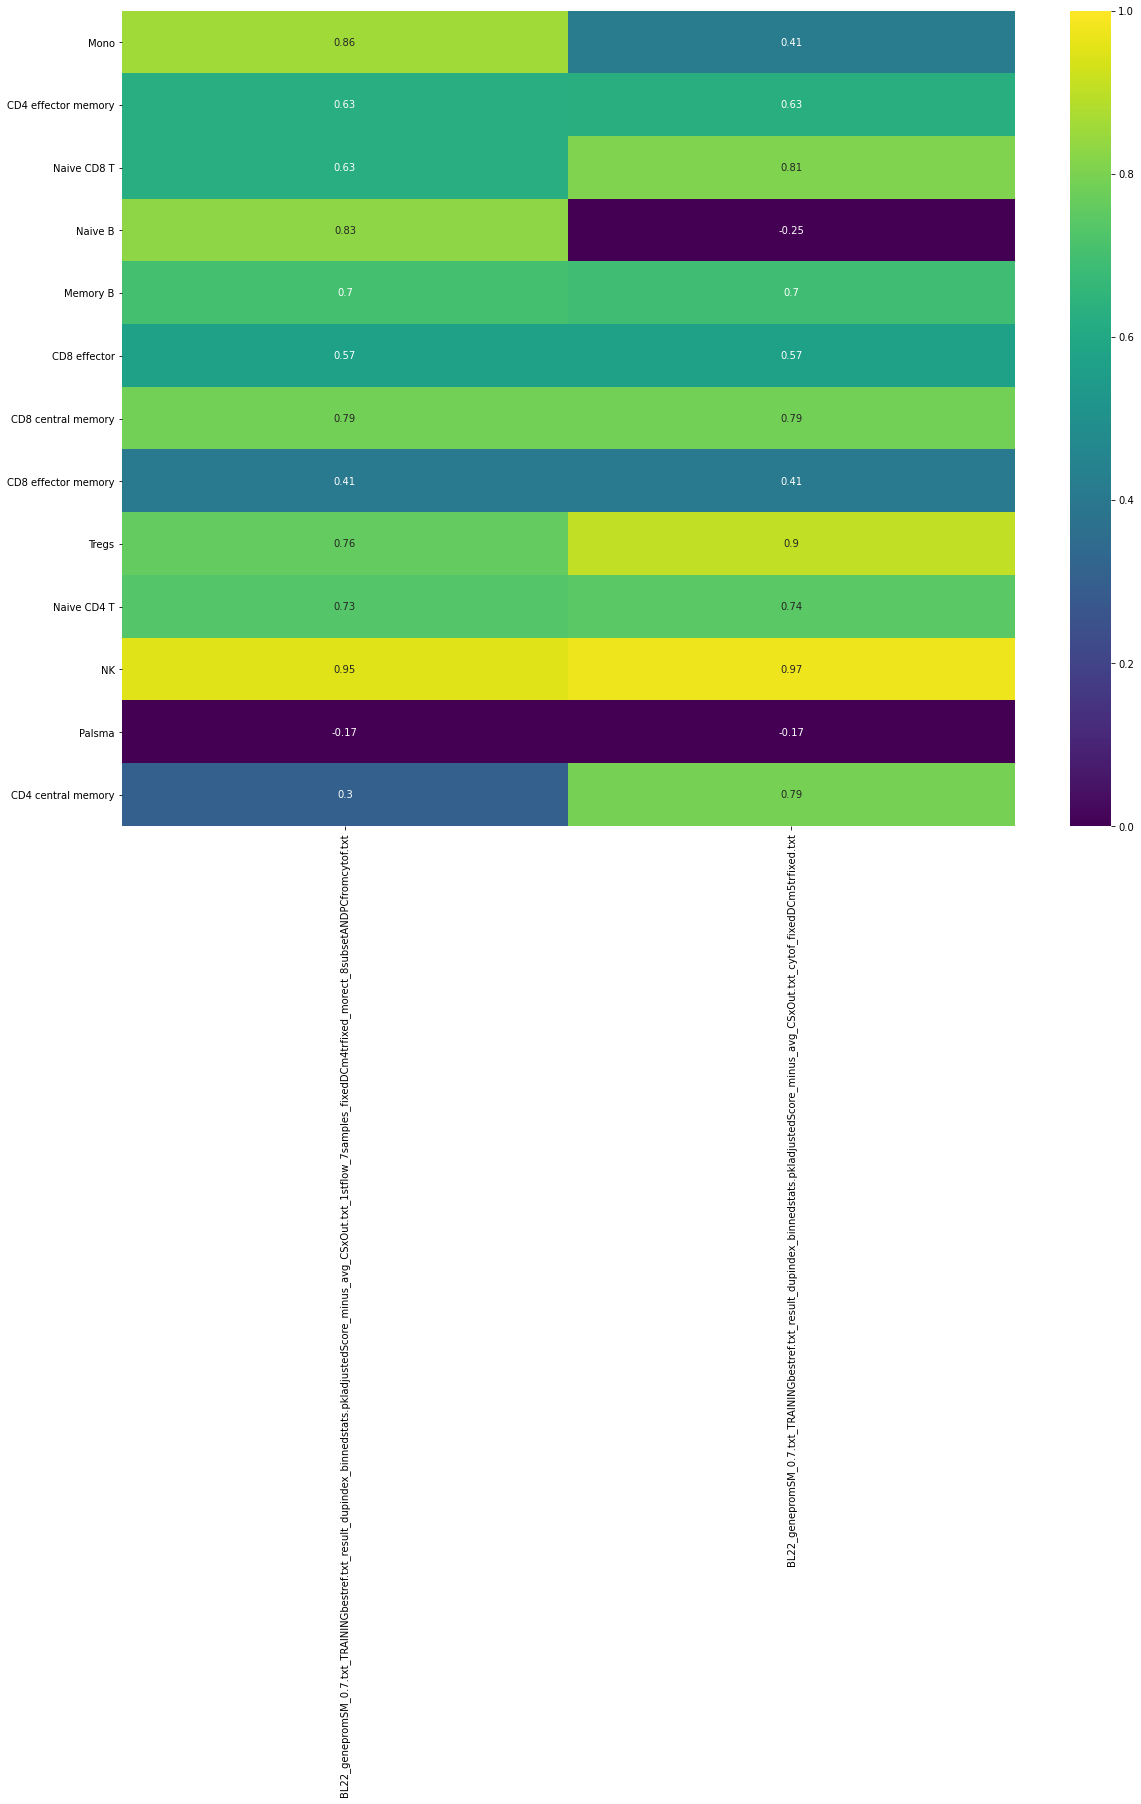

In [10]:
plt.figure(figsize=(20,15))
pearson_heatmap = sns.heatmap(df_pearson, cmap='viridis', annot=True, vmin=0.0, vmax=1.0)
pearson_heatmap.set_facecolor('gray')
plt.savefig(fol + '_pearson_heatmap.pdf', bbox_inches='tight')

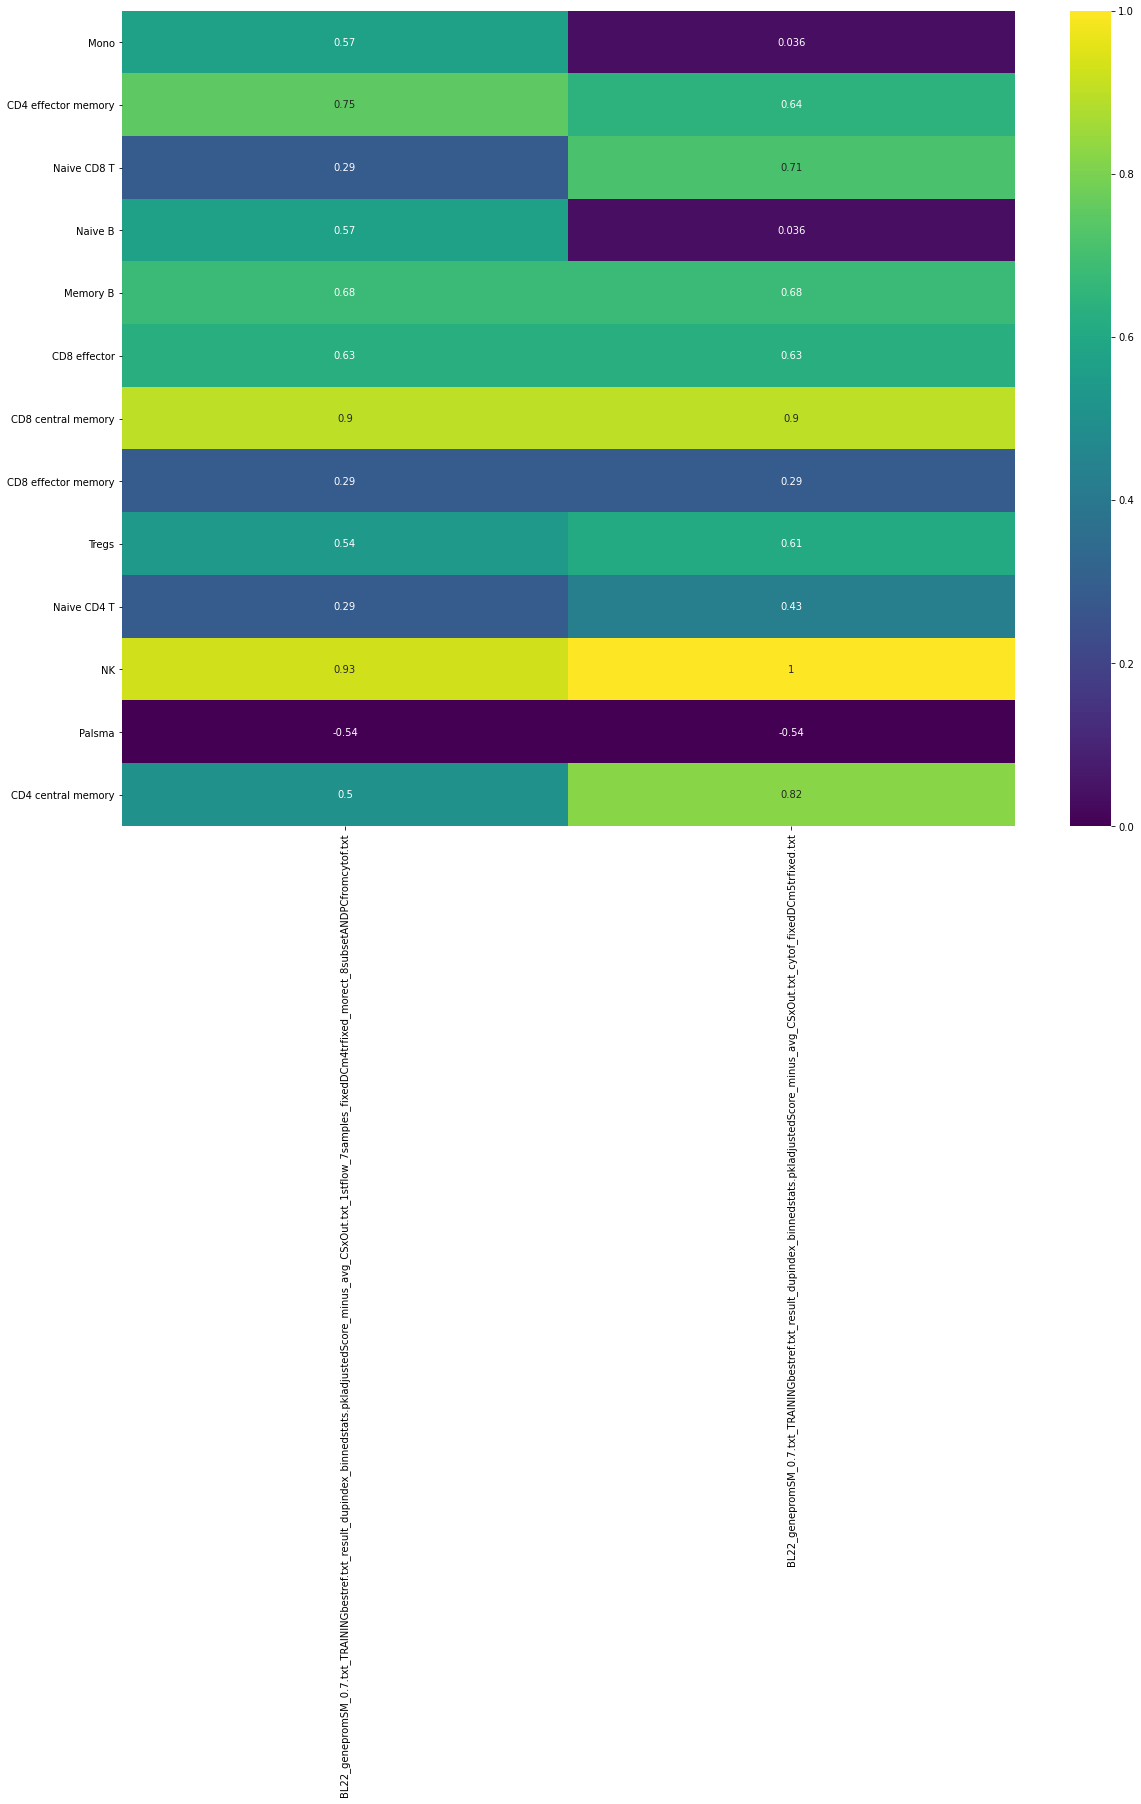

In [11]:
plt.figure(figsize=(20,15))
spearman_heatmap = sns.heatmap(df_spearman, cmap='viridis', annot=True, vmin=0.0, vmax=1.0)
spearman_heatmap.set_facecolor('gray')
plt.savefig(fol + '_spearman_heatmap.pdf', bbox_inches='tight')